# Introduction

You work as an analyst for the telecommunications company Megaline. The company offers customers two prepaid plans: Surf and Ultimate. The commercial department wants to know which of the plans generates the most revenue to adjust the advertising budget.

You will perform a preliminary analysis of plans based on a small selection of customers. You will have data on 500 Megaline customers: which customers they are, where they are from, which plan they use and the number of calls and messages made in 2018. Your job is to analyze customer behavior and determine which prepaid plan generates the most revenue .

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
# Importing plot libs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('darkgrid')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pal = sns.color_palette('rainbow')
pal.as_hex()

['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']

In [4]:
str(pal.as_hex())

"['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']"

# Reading Data Sets

In [5]:
df_users = pd.read_csv('datasets/megaline_users.csv', keep_default_na=False)
df_calls = pd.read_csv('datasets/megaline_calls.csv')
df_messages = pd.read_csv('datasets/megaline_messages.csv')
df_internet = pd.read_csv('datasets/megaline_internet.csv')
df_plans = pd.read_csv('datasets/megaline_plans.csv')

# Exploratory Data Analysis

## DataFrame `Plans`

In [6]:
# Printing information about the data set
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [7]:
# Checking the first 5 rows of the df
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There are no duplicate or missing values, the data types are appropriate, and the column names are very descriptive.

## DataFrame `Users`

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
392,1392,Gale,Mcfadden,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-24,surf,
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,
377,1377,Vallie,Conway,18,"Rochester, NY MSA",2018-03-27,surf,
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,


In [10]:
df_users['plan'].value_counts()

plan
surf        339
ultimate    161
Name: count, dtype: int64

In [11]:
df_users.duplicated().sum()

0

In [12]:
df_users.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

There are no duplicate or missing values, the data types are appropriate, and the column names are very descriptive.

## DataFrame `Calls`

In [13]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [15]:
df_calls.duplicated().sum()

0

In [16]:
df_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [17]:
# Converting the data type of the call_date column to datetime.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Corrected the data type of the call_date column to datetime. Additionally, there are no duplicate or missing values, in the other columns the data types are appropriate and the names are descriptive.

## DataFrame `Messages`

In [18]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [20]:
df_messages.duplicated().sum()

0

In [21]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [22]:
# Renaming the id column to message_id
df_messages = df_messages.rename(columns={'id': 'message_id'})
# Converting the data type of the message_date column to datetime.
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [23]:
df_users_plan = df_users[['user_id', 'plan']]
df_messages = pd.merge(df_messages, df_users_plan, on='user_id', how='left')

Corrected the data type of the message_date column to datetime and renamed the id column to message_id. Additionally, there are no duplicate or missing values. We also added the plan column with user plans.

## DataFrame `Internet`

In [24]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [26]:
df_internet.duplicated().sum()

0

In [27]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [28]:
# Renaming the id column to session_id.
df_internet = df_internet.rename(columns={'id': 'session_id'})
# Converting the data type of the session_date column to datetime.
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [29]:
df_users_plan = df_users[['user_id', 'plan']]
df_internet = pd.merge(df_internet, df_users_plan, on='user_id', how='left')

Corrected the data type of the session_date column to datetime and renamed the id column to session_id. Additionally, there are no duplicate or missing values. We also added the plan column with user plans.

# Aggregating Data by User


In [30]:
# Merging call and user dataframes.
merged_calls = pd.merge(df_calls, df_users, on='user_id', how='outer')
# Extracting the month from the call date
merged_calls['month'] = merged_calls['call_date'].dt.month
# Grouping the data by user and month, and counting the number of calls.
calls_per_month = merged_calls.groupby(['user_id', 'month']).size().reset_index(name='num_calls')

In [31]:
# Merging call and user dataframes.
merged_mins = pd.merge(df_calls, df_users, on='user_id', how='outer')
# Grouping the data by month and adding the duration of each call.
minutes_per_month = merged_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

In [32]:
# Merging message and user dataframes.
merged_messages = pd.merge(df_messages, df_users, on='user_id', how='outer')
# Extracting the month from the date of each message.
merged_messages['month'] = merged_messages['message_date'].dt.month
# Grouping the data by month and adding the number of messages.
messages_per_month = merged_messages.groupby(['user_id', 'month']).size().reset_index(name='num_messages')

In [33]:
# Merging internet and user dataframes.
merged_internet = pd.merge(df_internet, df_users, on='user_id', how='outer')
# Extracting the month from the date of each session.
merged_internet['month'] = merged_internet['session_date'].dt.month
# Grouping the data by month and adding up the MB used.
session_per_month = merged_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_session_mb')

In [34]:
# Merging our aggregated data above into a single dataframe.
merged_df = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')
merged_df = pd.merge(merged_df, messages_per_month, on=['user_id', 'month'], how='outer')
merged_df = pd.merge(merged_df, session_per_month, on=['user_id', 'month'], how ='outer')
merged_df.head(10)

,user_id,month,num_calls,total_minutes,num_messages,total_session_mb
0,1000,12.0,16.0,116.83,11.0,1901.47
1,1001,8.0,27.0,171.14,30.0,6919.15
2,1001,9.0,49.0,297.69,44.0,13314.82
3,1001,10.0,65.0,374.11,53.0,22330.49
4,1001,11.0,64.0,404.59,36.0,18504.30
5,1001,12.0,56.0,392.93,44.0,19369.18
6,1002,10.0,11.0,54.13,15.0,6552.01
7,1002,11.0,55.0,359.76,32.0,19345.08
8,1002,12.0,47.0,363.24,41.0,14396.24
9,1003,12.0,149.0,1041.00,50.0,27044.14


In [35]:
# Adding the name of each user's plan so we have a way to use merge.
df_users_plan = df_users[['user_id', 'plan']]
merged_data = pd.merge(merged_df, df_users_plan, on='user_id', how='outer')
# Merging the data from each plan into our dataframe with the aggregated data.
merged_data = pd.merge(merged_data, df_plans, left_on='plan', right_on='plan_name', how='left')
# Removing the plan_name column as we already have the plan column.
merged_data.drop(columns=['plan_name'], inplace=True)
# Filling null values with 0.
merged_data = merged_data.fillna(0)
merged_data.info()
print()
merged_data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2303 non-null   float64
 2   num_calls              2303 non-null   float64
 3   total_minutes          2303 non-null   float64
 4   num_messages           2303 non-null   float64
 5   total_session_mb       2303 non-null   float64
 6   plan                   2303 non-null   object 
 7   messages_included      2303 non-null   int64  
 8   mb_per_month_included  2303 non-null   int64  
 9   minutes_included       2303 non-null   int64  
 10  usd_monthly_pay        2303 non-null   int64  
 11  usd_per_gb             2303 non-null   int64  
 12  usd_per_message        2303 non-null   float64
 13  usd_per_minute         2303 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 252.0+ 

,user_id,month,num_calls,total_minutes,num_messages,total_session_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9.0,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10.0,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11.0,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03


In [36]:
# Creating a function to calculate monthly revenue.
def calculate_revenue(row):
    # Setting the limits provided by the user plan.
    calls_limit = row['minutes_included']
    messages_limit = row['messages_included']
    mb_limit = row['mb_per_month_included'] / 1024 # Converting to GigaBytes.
    
    # Calculating the data each user used beyond what their plan provides.
    plus_calls = max(row['num_calls'] - calls_limit, 0)
    plus_messages = max(row['num_messages'] - messages_limit, 0)
    plus_mb = max(row['total_session_mb'] - (mb_limit * 1024), 0) / 1024
    
    # Calculating revenue for each service data.
    calls_revenue = plus_calls * row['usd_per_minute']
    messages_revenue = plus_messages * row['usd_per_message']
    mb_revenue = plus_mb * row['usd_per_gb']
    # Calculating total monthly income.
    total_revenue = calls_revenue + messages_revenue + mb_revenue + row['usd_monthly_pay']
    # Using round to round to only 2 decimal places
    total_revenue = round(total_revenue, 2)
    # Replacing null values with zero.
    if pd.isnull(total_revenue):
        total_revenue = 0
    return total_revenue

# Using our function across our dataframe with the aggregated data.
merged_data['monthly_revenue'] = merged_data.apply(calculate_revenue, axis=1)
merged_data.sample(10)

,user_id,month,num_calls,total_minutes,num_messages,total_session_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
1251,1262,12.0,40.0,275.72,57.0,16014.20,surf,50,15360,500,20,10,0.03,0.03,26.60
1922,1408,7.0,73.0,492.98,44.0,13941.88,surf,50,15360,500,20,10,0.03,0.03,20.00
1670,1359,9.0,52.0,326.72,0.0,30392.50,surf,50,15360,500,20,10,0.03,0.03,166.80
287,1063,11.0,9.0,63.39,0.0,10936.70,ultimate,1000,30720,3000,70,7,0.01,0.01,70.00
980,1203,6.0,62.0,448.16,34.0,13544.97,surf,50,15360,500,20,10,0.03,0.03,20.00
1750,1374,10.0,36.0,239.03,80.0,30118.56,surf,50,15360,500,20,10,0.03,0.03,165.03
461,1098,11.0,68.0,432.31,89.0,31063.77,surf,50,15360,500,20,10,0.03,0.03,174.53
1057,1221,12.0,20.0,100.40,11.0,7904.00,surf,50,15360,500,20,10,0.03,0.03,20.00
236,1055,7.0,38.0,257.83,79.0,15625.71,surf,50,15360,500,20,10,0.03,0.03,23.46
1593,1343,12.0,63.0,449.67,115.0,20502.94,surf,50,15360,500,20,10,0.03,0.03,72.17


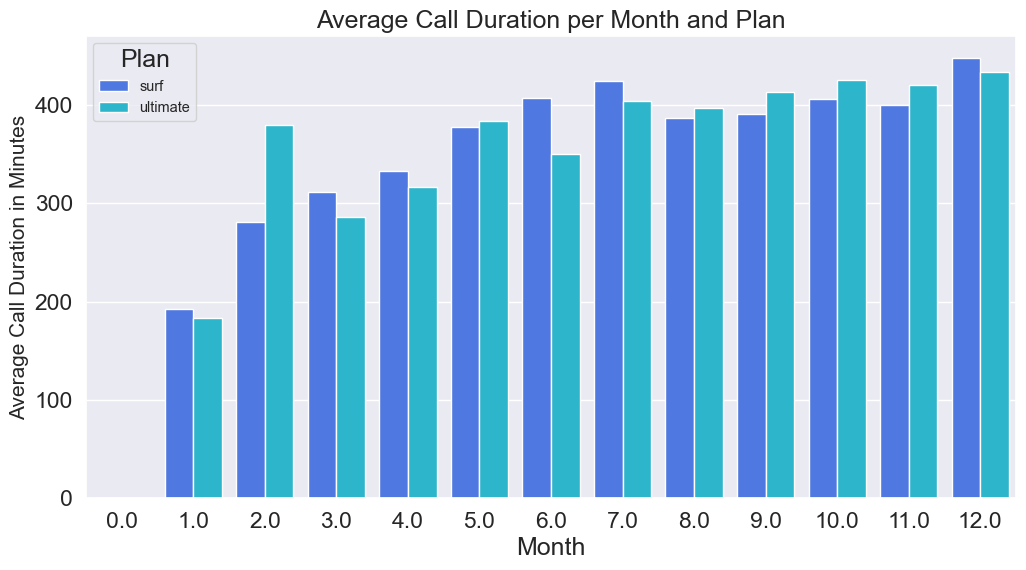

In [37]:
# Comparing the average call duration of each plan for each different month.
# Grouping a dataframe with average calls by plan and month.
average_call_duration = merged_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Creating a barplot with seaborn's
plt.figure(figsize=(12, 6));
sns.barplot(data=average_call_duration, x='month', y='total_minutes', hue='plan');
plt.legend(title='Plan', fontsize='xx-small');
plt.title('Average Call Duration per Month and Plan');
plt.xlabel('Month');
plt.ylabel('Average Call Duration in Minutes', fontsize='small');

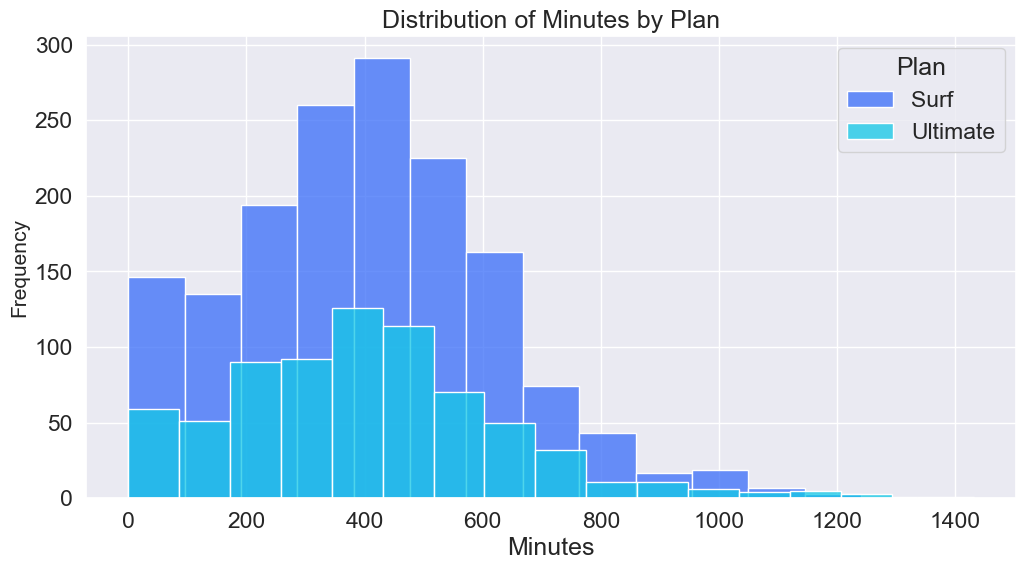

In [38]:
# Comparing the number of minutes users on each plan need each month.
# Filtering dataframes by plan.
df_surf = merged_data[merged_data['plan'] == 'surf']
df_ult = merged_data[merged_data['plan'] == 'ultimate']

# Creating a histogram with seaborn histplot.
plt.figure(figsize=(12, 6));
sns.histplot(data=df_surf, x='total_minutes', color='#386df9', label='Surf', bins=15);
sns.histplot(data=df_ult, x='total_minutes', color='#12c8e6', label='Ultimate', bins=15);
plt.legend(title='Plan');
plt.title('Distribution of Minutes by Plan');
plt.xlabel('Minutes');
plt.ylabel('Frequency', fontsize='small');

In [39]:
# Calculating average and variation in monthly call duration

# Creating the month column in df_calls by extracting the month from the call_date column.
df_calls['month'] = df_calls['call_date'].dt.month
# Grouping by month and calculating the average monthly call duration.
avg_dur_monthly = df_calls.groupby('month')['duration'].mean()
# Grouping and calculating the variation in monthly call duration.
var_dur_monthly = df_calls.groupby('month')['duration'].var()

print(f'Average monthly call duration: {avg_dur_monthly}')
print()
print(f'Variation in monthly call duration: {var_dur_monthly}')

Average monthly call duration: month
1     6.501919
2     6.701150
3     6.531315
4     6.759346
5     6.739282
6     6.804571
7     6.770786
8     6.690801
9     6.741825
10    6.704182
11    6.753779
12    6.783891
Name: duration, dtype: float64

Variation in monthly call duration: month
1     32.741969
2     34.405031
3     32.592684
4     33.013931
5     34.544859
6     34.632745
7     33.808500
8     33.866955
9     34.447367
10    33.925327
11    34.051191
12    34.242762
Name: duration, dtype: float64


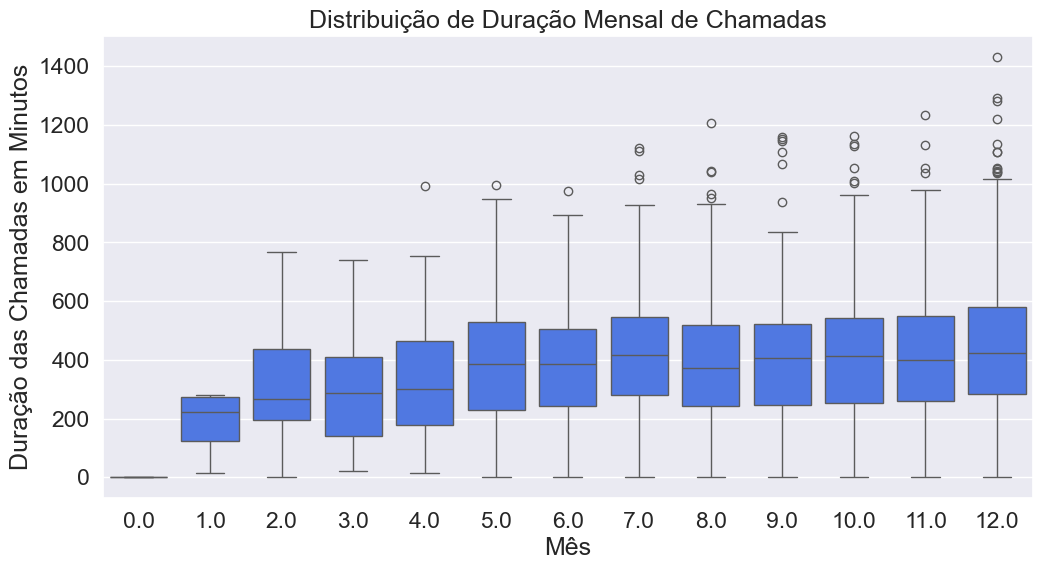

In [40]:
# Creating a boxplot to visualize the distribution of monthly call durations
plt.figure(figsize=(12, 6));
sns.boxplot(data=merged_data, x='month', y='total_minutes');
plt.title('Distribuição de Duração Mensal de Chamadas');
plt.xlabel('Mês');
plt.ylabel('Duração das Chamadas em Minutos');

In terms of monthly minutes for each plan, with our graphs we saw that on average the vast majority of users do not exceed the 500 monthly minutes mark, the minority of users who exceed this time add up to a few more minutes, making the Surf plan more profitable for users in terms of monthly minutes, taking into account that it is very rare for a customer to reach 3000 monthly minutes.

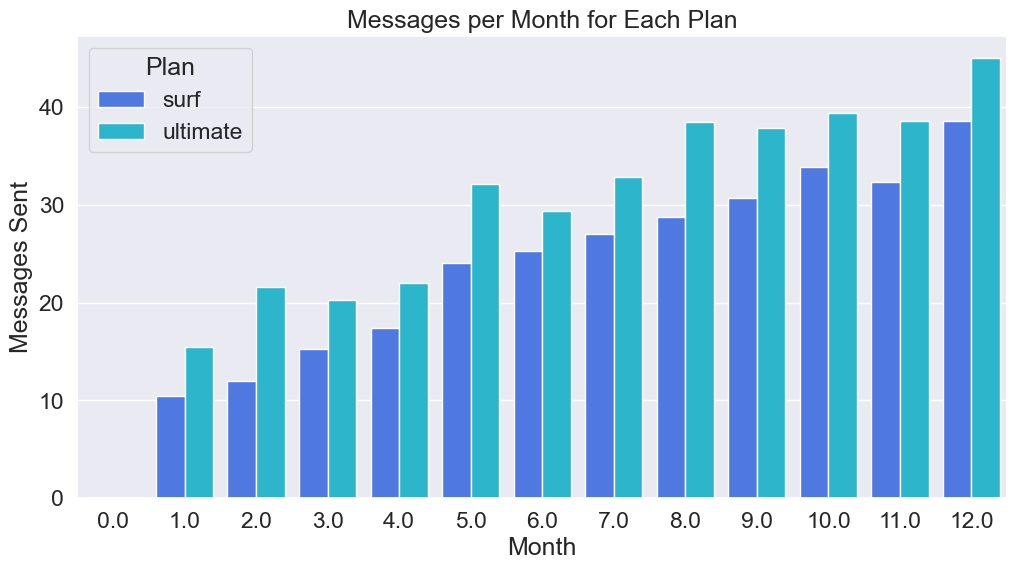

In [41]:
# Comparing the number of messages users on each plan tend to send each month.

# Grouping by user of each plan for each month, and counting the number of messages sent.
msg_per_month = merged_data.groupby(['plan', 'month'])['num_messages'].mean().reset_index()
# Creating a barplot to compare the number of messages.
plt.figure(figsize=(12, 6));
sns.barplot(data=msg_per_month, x='month', y='num_messages', hue='plan');
plt.legend(title='Plan');
plt.title('Messages per Month for Each Plan');
plt.xlabel('Month');
plt.ylabel('Messages Sent');

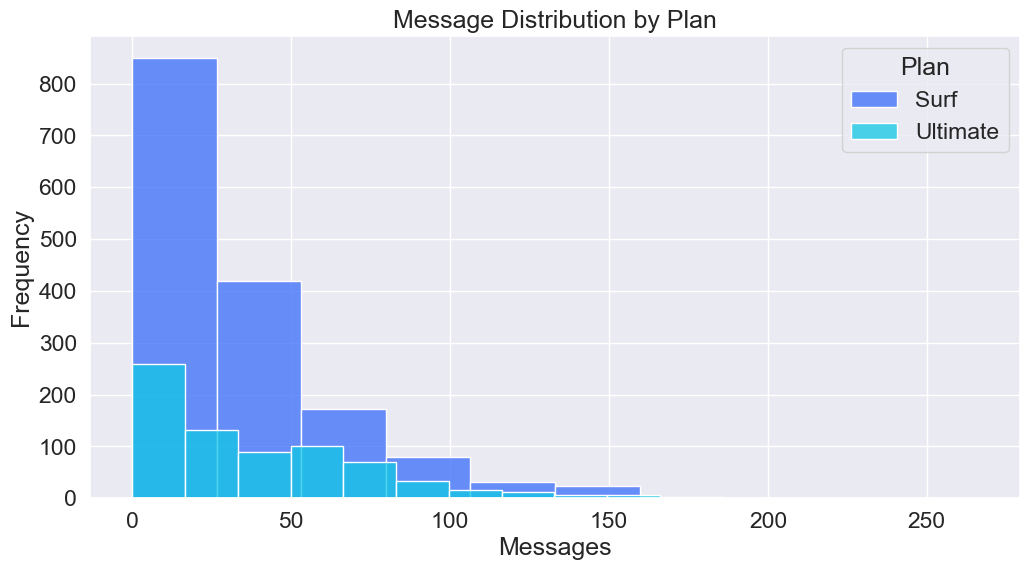

In [42]:
# Filtering dataframes by plan.
surf_df = merged_data[merged_data['plan'] == 'surf']
ult_df = merged_data[merged_data['plan'] == 'ultimate']
# Creating a histogram with seaborn histplot.
plt.figure(figsize=(12, 6));
sns.histplot(data=surf_df, x='num_messages', color='#386df9', label='Surf', bins=10);
sns.histplot(data=ult_df, x='num_messages', color='#12c8e6', label='Ultimate', bins=10);
plt.legend(title='Plan');
plt.title('Message Distribution by Plan');
plt.xlabel('Messages');
plt.ylabel('Frequency');

Taking into account the average number of monthly messages for each plan, both plans have an average of less than 50 text messages, and analyzing our histogram, few users exceed the 50 message mark, given these two factors, the Surf plan also and more profitable for the user in terms of monthly messages.

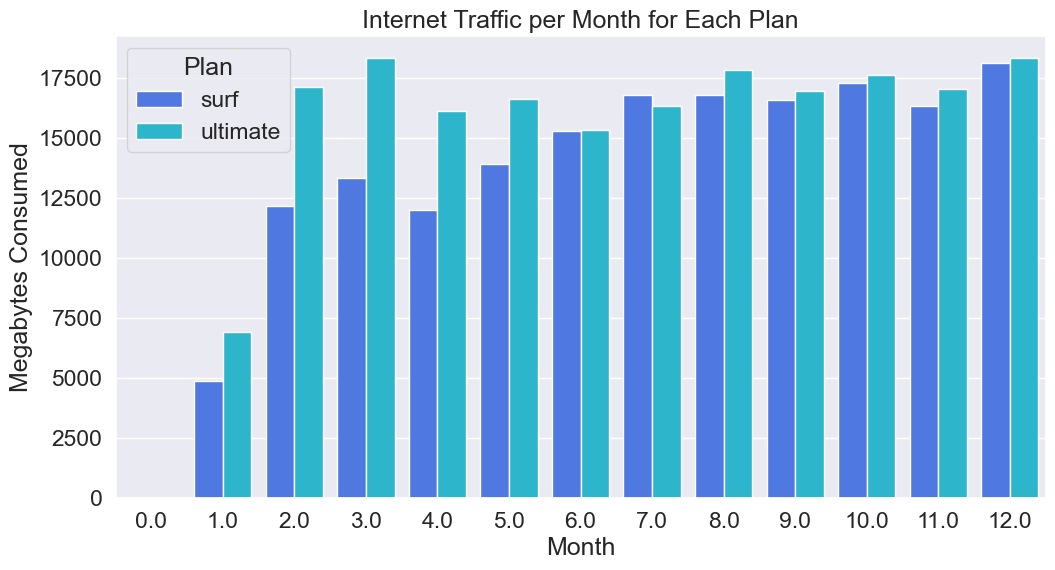

In [43]:
# Comparing the amount of internet traffic consumed by users per plan

# Grouping by user of each plan for each month, and counting the total megabytes.
sess_per_month = merged_data.groupby(['plan', 'month'])['total_session_mb'].mean().reset_index()
# Creating a barplot to compare the GBs used by each plan.
plt.figure(figsize=(12, 6));
sns.barplot(data=sess_per_month, x='month', y='total_session_mb', hue='plan');
plt.legend(title='Plan');
plt.title('Internet Traffic per Month for Each Plan');
plt.xlabel('Month');
plt.ylabel('Megabytes Consumed');

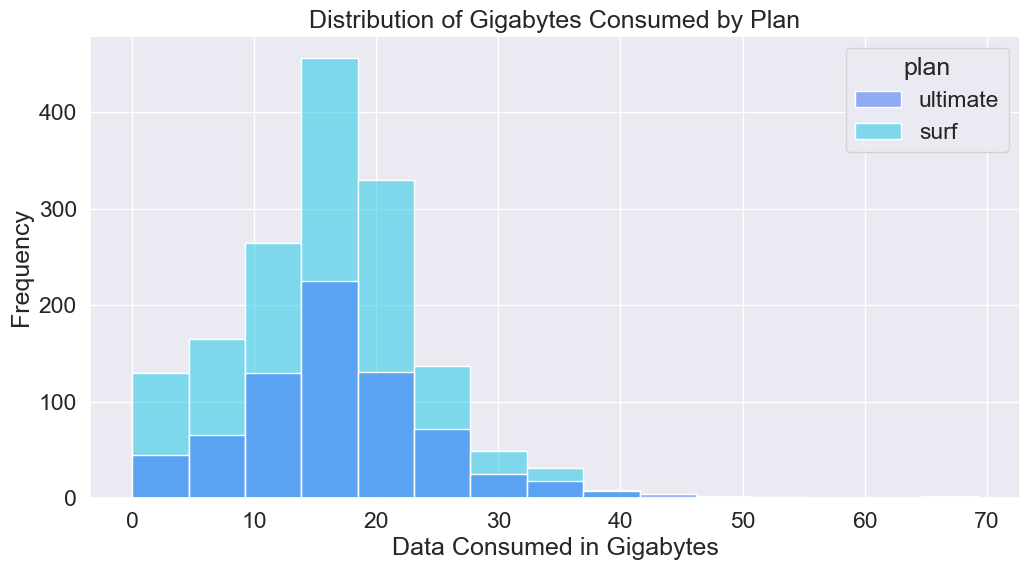

In [44]:
# Creating a column megabytes are converted to gigabytes.
merged_data['total_session_gb'] = merged_data['total_session_mb'] / 1024
# Creating a histogram with seaborn histplot.
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='total_session_gb', hue='plan', bins=15)
plt.title('Distribution of Gigabytes Consumed by Plan')
plt.xlabel('Data Consumed in Gigabytes')
plt.ylabel('Frequency')
plt.show()

Analyzing the average monthly megabytes used by users, we see that this time the average exceeds the value offered by the Surf plan in 7 different months, and taking into account the value of each gigabyte used after reaching the limit, users of the Ultimate plan are more comfortable in this regard.

In [45]:
# Separating the monthly revenue for each plan.
surf_revenue = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']
ult_revenue = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']

# Calculating the average and median revenue for each plan
surf_mean = round(surf_revenue.mean(), 2)
ult_mean = round(ult_revenue.mean(), 2)
surf_median = surf_revenue.median()
ult_median = ult_revenue.median()
# Printing the statistics.
print(f'Average revenue from the Surf plan: {surf_mean}')
print(f'Average revenue for the Ultimate plan : {ult_mean}')
print()
print(f'Median revenue for the Surf plan: {surf_median}')
print(f'Median revenue for the Ultimate plan: {ult_median}')

Average revenue from the Surf plan: 55.69
Average revenue for the Ultimate plan : 72.1

Median revenue for the Surf plan: 34.35
Median revenue for the Ultimate plan: 70.0


In [46]:
# Analyzing the revenue variance of each plan.
surf_var = surf_revenue.var()
ult_var = ult_revenue.var()
# Analyzing the standard deviation of revenues for each plan.
surf_std = surf_revenue.std()
ult_std = ult_revenue.std()
# Printing the statistics
print(f'Revenue variance for the Surf plan: {surf_var}')
print(f'Revenue variance for the Ultimate plan: {ult_var}')
print()
print(f'Standard deviation of Surf plan revenue: {surf_var}')
print(f'Standard deviation of Ultimate plan revenue: {ult_var}')

Revenue variance for the Surf plan: 2805.1511603853846
Revenue variance for the Ultimate plan: 115.351087441639

Standard deviation of Surf plan revenue: 2805.1511603853846
Standard deviation of Ultimate plan revenue: 115.351087441639


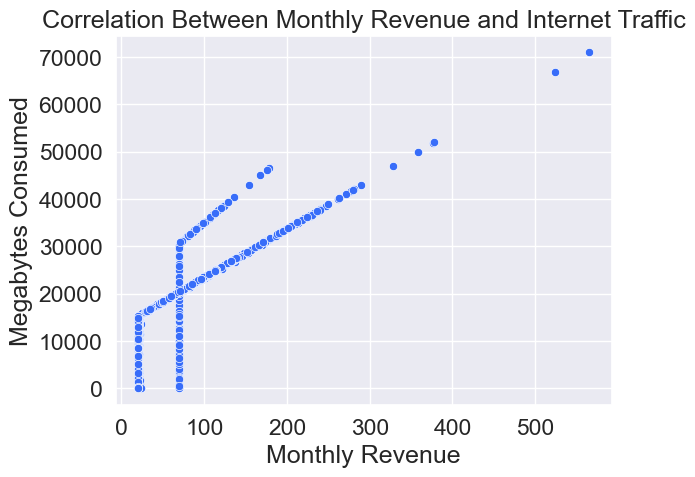

In [47]:
# Building a scatterplot to analyze the correlation of monthly_revenue with total_session_mb.
sns.scatterplot(data=merged_data, x='monthly_revenue', y='total_session_mb');
plt.title('Correlation Between Monthly Revenue and Internet Traffic');
plt.xlabel('Monthly Revenue');
plt.ylabel('Megabytes Consumed');

/var/folders/dr/55yp04xs2t9gv6g4yfxw8njr0000gp/T/ipykernel_11292/4033954881.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_data, x='month', y='monthly_revenue', hue='plan', ci=None);


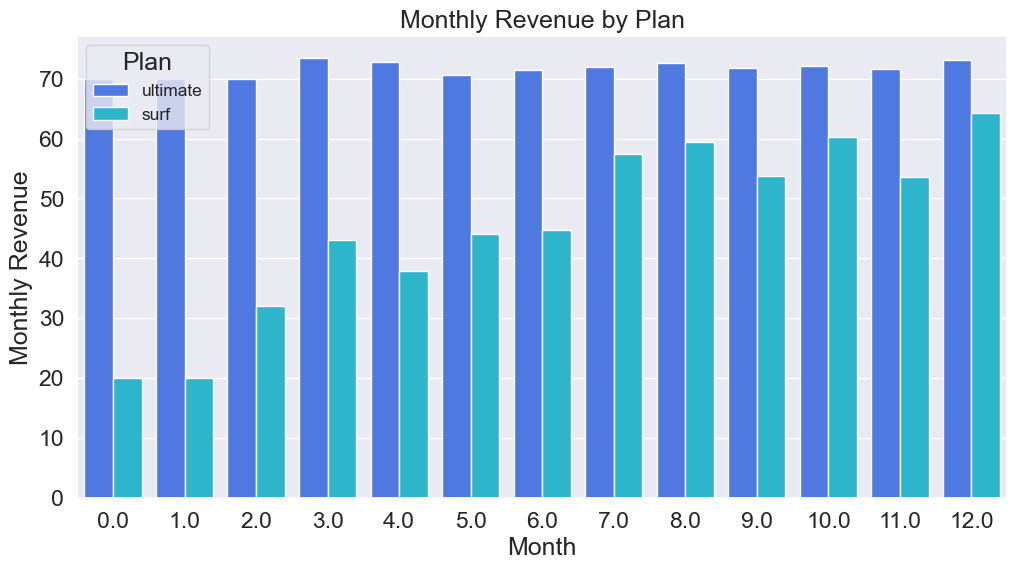

In [48]:
# Creating a barplot to see the monthly revenue for each plan.
plt.figure(figsize=(12, 6));
sns.barplot(data=merged_data, x='month', y='monthly_revenue', hue='plan', ci=None);
plt.legend(title='Plan', fontsize='x-small');
plt.title('Monthly Revenue by Plan');
plt.xlabel('Month');
plt.ylabel('Monthly Revenue');

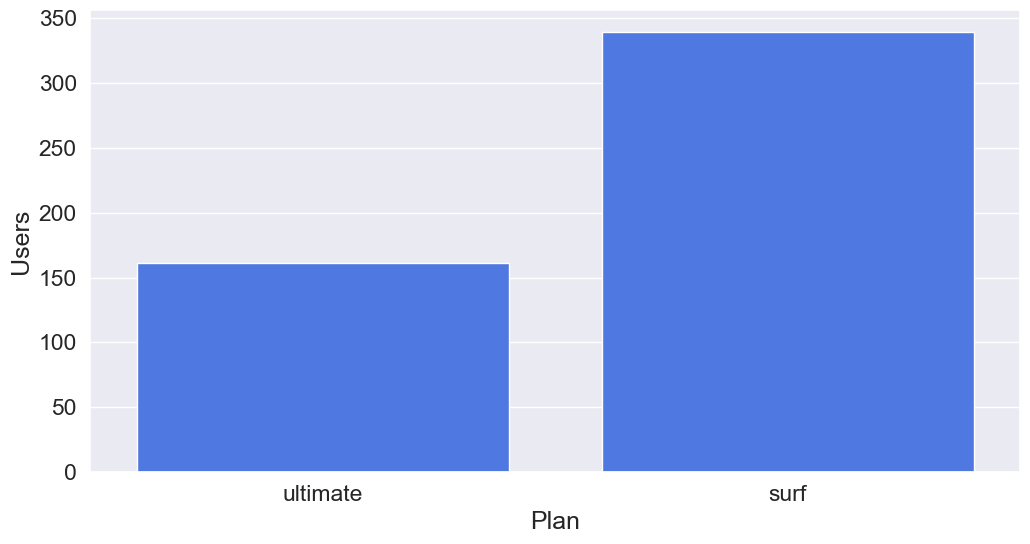

In [49]:
# Creating a countplot to see the number of users for each plan.
plt.figure(figsize=(12, 6));
sns.countplot(data=df_users, x='plan');
plt.xlabel('Plan');
plt.ylabel('Users');

Even though the average and median income of the ultimate plan is higher than that of the surf plan, we note that the surf plan brings a higher monthly income, this is due to the number of users of the plan, which is double that of the ultimate plan. We can also analyze that there is a good correlation between monthly revenue linked to the amount of megabytes spent by users, since as we saw previously, the only factor that makes most users of the surf plan exceed the amount offered is the gigabytes of data, which makes the monthly average for the Surf plan is 55 reais, even though the monthly price is only $20.

# Statistical Hypothesis Testing

In [50]:
# Hypothesis about the difference in average revenues between plans:
# H0: The average revenue of Surf plan users is equal to the average revenue of Ultimate plan users.
# H1: The average revenue of Surf plan users is different from the average revenue of Ultimate plan users.

# Extracting samples of revenue from each plan.
surf_revenue = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']
ult_revenue = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
# Calculating and printing the variances
surf_var = surf_revenue.var()
ult_var = ult_revenue.var()
print(f'Surf plan revenue variance: {surf_var}')
print(f'Ultimate plan revenue variance: {ult_var}')
print()
# Defining the alpha
alpha = 0.05
# Performing the T test.
results = st.ttest_ind(surf_revenue, ult_revenue, equal_var=False)
# Analyzing the results
print(f'pvalue: {results.pvalue}')
if results.pvalue < alpha:
    print('We reject the null hypothesis. Revenue averages are different')
else:
    print('We cannot reject the null hypothesis. There is no significant difference between revenue averages.')

Surf plan revenue variance: 2805.1511603853846
Ultimate plan revenue variance: 115.351087441639

pvalue: 5.227872538905227e-31
We reject the null hypothesis. Revenue averages are different


Based on the sample analyzed, we see that the average revenue is different for each plan.

In [51]:
# Hypothesis about the difference in average revenues between NY-NJ users and other regions:
# H0: The average revenue of users in the NY-NJ region is the same as the average revenue of users in the other regions.
# H1: The average revenue of users in the NY-NJ region is different from the average revenue of users

# Merging df_users for add the city column to our merged_data
merged_city = pd.merge(merged_data, df_users[['user_id', 'city']], on='user_id', how='left')
# Extracting samples of revenue from each regions.
nynj_revenue = merged_city[merged_city['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']
others_revenue = merged_city[~merged_city['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']
# Calculating and printing variances.
nynj_revenue_var = nynj_revenue.var()
others_revenue_var = others_revenue.var()
print(f'Revenue variance for users in the NY-NJ region: {nynj_revenue_var}')
print(f'Revenue variance for users in other regions: {others_revenue_var}')
print()
# Defining the alpha
alpha = 0.05
# Performing the T test.
results = st.ttest_ind(nynj_revenue, others_revenue, equal_var=False)
# Analyzing the results
print(f'pvalue: {results.pvalue}')
if results.pvalue < alpha:
    print("We reject the null hypothesis. NY-NJ's average income differs from other regions' average income")
else:
    print("We cannot reject the null hypothesis. There is no significant difference between the average revenues of NY-NJ and the other regions.")

Revenue variance for users in the NY-NJ region: 1749.7664160414288
Revenue variance for users in other regions: 2065.5584504147973

pvalue: 0.019864047462541154
We reject the null hypothesis. NY-NJ's average income differs from other regions' average income


Based on the sample analyzed, we see that the average revenue in NY-NJ differs from other regions.

In [52]:
# Hypothesis about the average megabytes used between plans
# H0: The average mb consumption of Surf plan users is equal to the average consumption of Ultimate plan users.
# H1: The average mb consumption of Surf plan users is different from the average consumption of Ultimate plan users.

# Extracting the megabytes used by each plan.
mb_surf = merged_data[merged_data['plan'] == 'surf']['total_session_mb']
mb_ult = merged_data[merged_data['plan'] == 'ultimate']['total_session_mb']
# Calculating and printing variances.
var_surf = mb_surf.var()
var_ult = mb_ult.var()
print(f'Surf plan mb variance: {var_surf}')
print(f'Ultimate plan mb variance: {var_ult}')
print()
# Defining the alpha
alpha = 0.05
# Performing the T test.
results = st.ttest_ind(mb_surf, mb_ult, equal_var=False)
# Analyzing the results
print(f'pvalue: {results.pvalue}')
if results.pvalue < alpha:
    print('We reject the null hypothesis. The averages are different')
else:
    print('')

Surf plan mb variance: 65010762.83183729
Ultimate plan mb variance: 62941678.23207422

pvalue: 0.08136963147919583



Based on the sample analyzed, we see that the average data consumption of users on each plan is similar.

# Conclusion

After cleaning and enriching the data, we sometimes use the pd.merge function to merge our 5 dataframes into just 1 dataframe with our necessary data aggregated in it. We use this dataframe to separately calculate the calling, messaging and internet data used by each user on each plan, then calculate the monthly revenue and draw conclusions based on this. We noticed that the Surf plan generates more revenue and is more profitable from the users' point of view, this makes this plan the one that attracts the most subscribers to the company, even though the ultimate plan is more expensive, its monthly revenue is lower because the surf plan has more users , there are rare occasions when users of the ultimate plan exceed the data offered by the plan.